<a href="https://colab.research.google.com/github/LuvAg/ML_ASSIGNMENT_1_23110261_23110189_23110306/blob/main/ML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity.
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/train"
test_path = "/content/drive/MyDrive/es335-24-fall-assignment-1-master/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):

            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))

            label_idxs = labels[labels.iloc[:,0] == label].index

            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]

            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [ ]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Training data shape: ",y_train.shape)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training data shape:  (126,)


Dependencies

Task 1 Question 1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


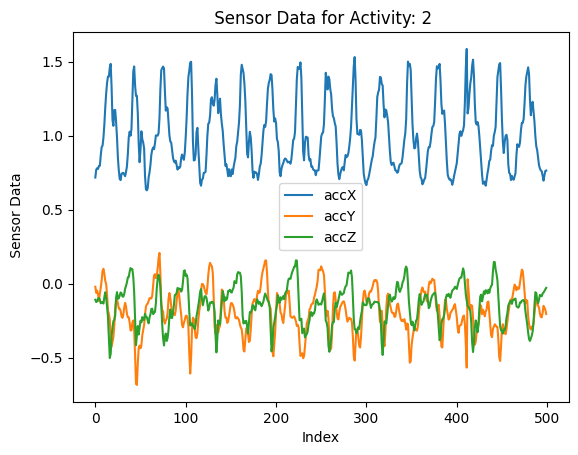

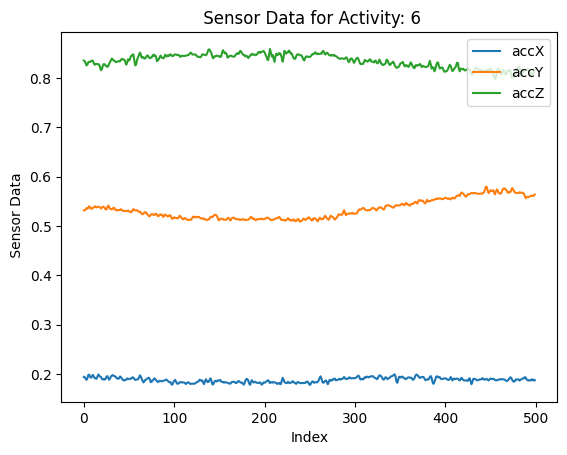

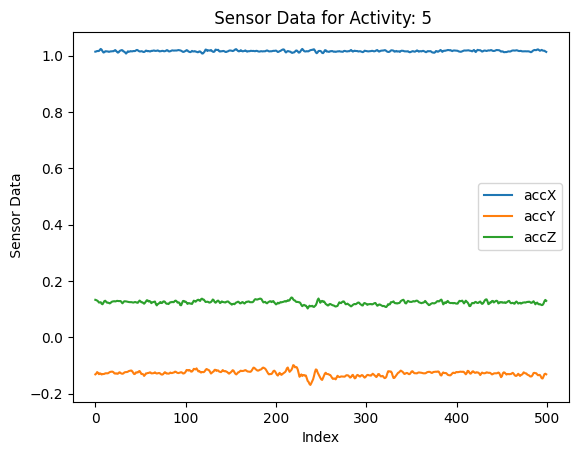

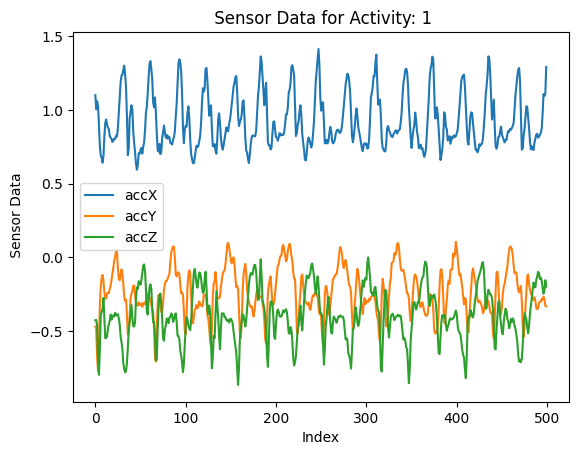

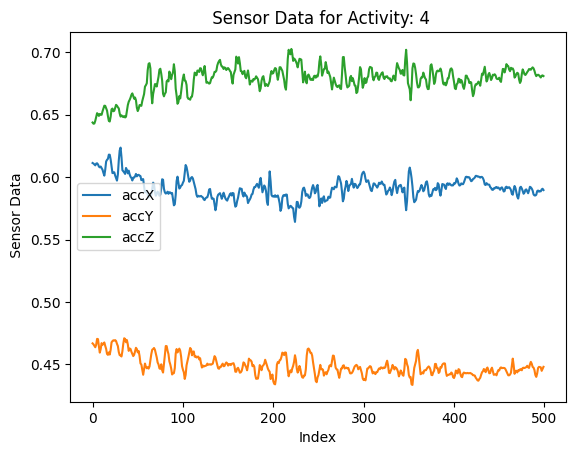

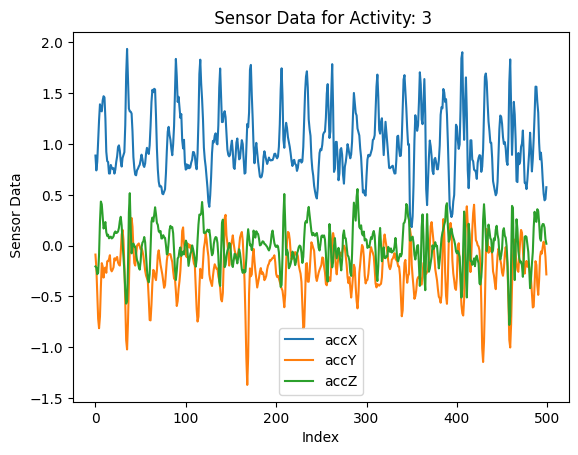

In [ ]:
df_A = pd.DataFrame({
    'Activity': y_train,
    'SensorData accX': [i for i in X_train[:,:,0]],
    'SensorData accY': [i for i in X_train[:,:,1]],
    'SensorData accZ': [i for i in X_train[:,:,2]]
})

# median_accX = group['SensorData accX'].apply(lambda x: pd.Series(x).median())
# median_accY = group['SensorData accY'].apply(lambda x: pd.Series(x).median())
# median_accZ = group['SensorData accZ'].apply(lambda x: pd.Series(x).median())
import pandas as pd

# Assuming df_A has the relevant columns as 'SensorData accX', 'SensorData accY', 'SensorData accZ'
# Directly extract the columns and concatenate them
def explode_dataframe(df):
    # Repeat the 'Activity' column 500 times for each row
    repeated_activity = df.loc[df.index.repeat(500), 'Activity'].reset_index(drop=True)

    # Explode the lists in each sensor column
    exploded_accX = df['SensorData accX'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accY = df['SensorData accY'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accZ = df['SensorData accZ'].apply(pd.Series).stack().reset_index(drop=True)
    exploded_accZ = df['SensorData accZ'].apply(pd.Series).stack().reset_index(drop=True)

    # Combine the exploded columns into a new DataFrame
    exploded_df = pd.DataFrame({
        'Activity': repeated_activity,
        'SensorData accX': exploded_accX,
        'SensorData accY': exploded_accY,
        'SensorData accZ': exploded_accZ
    })

    return exploded_df


l=[]
for i in range(len(df_A)):
  act=df_A.loc[i,'Activity']
  if not(df_A.loc[i,'Activity'] in l):
    plt.figure()
    l.append(df_A.loc[i,'Activity'])
    plt.plot(df_A.loc[i,'SensorData accX'], label='accX')
    plt.plot(df_A.loc[i,'SensorData accY'], label='accY')
    plt.plot(df_A.loc[i,'SensorData accZ'], label='accZ')

    plt.title(f' Sensor Data for Activity: {act}')
    plt.xlabel('Index')
    plt.ylabel(' Sensor Data')
    plt.legend()
    plt.show()

Task1 -Q1

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Sample DataFrame, assuming you already have y_train and X_train defined
# df_A = pd.DataFrame({
#     'Activity': y_train,
#     'SensorData accX': [i for i in X_train[:,:,0]],
#     'SensorData accY': [i for i in X_train[:,:,1]],
#     'SensorData accZ': [i for i in X_train[:,:,2]]
# })

# df_A_Groupby = df_A.groupby('Activity')

# # Create subplots with 6 columns (assuming you have 6 different activities)
# num_activities = df_A['Activity'].nunique()
# fig, axes = plt.subplots(nrows=1, ncols=num_activities, figsize=(20, 5))

# # Loop over each activity and plot on a corresponding subplot
# for i, (activity, group) in enumerate(df_A_Groupby):
#     median_accX = group['SensorData accX'].apply(lambda x: pd.Series(x).median())
#     median_accY = group['SensorData accY'].apply(lambda x: pd.Series(x).median())
#     median_accZ = group['SensorData accZ'].apply(lambda x: pd.Series(x).median())

#     ax = axes[i]  # Select the subplot for the current activity
#     ax.plot(group.index, median_accX, label='accX Median', marker='o')
#     ax.plot(group.index, median_accY, label='accY Median', marker='o')
#     ax.plot(group.index, median_accZ, label='accZ Median', marker='o')

#     ax.set_title(f'Sensor Data for Activity: {activity}')
#     ax.set_xlabel('Index')
#     ax.set_ylabel('Sensor Data')
#     ax.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


Task1 Question 2

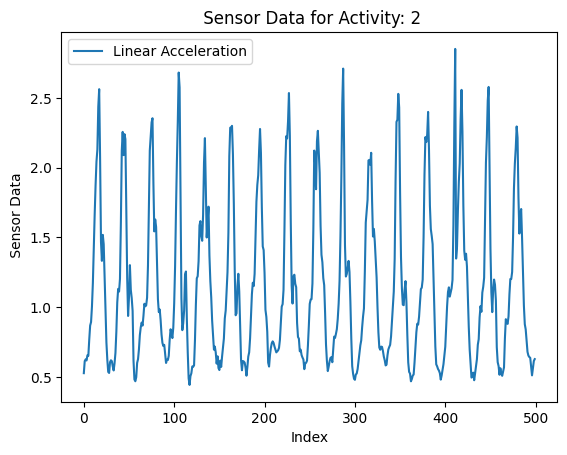

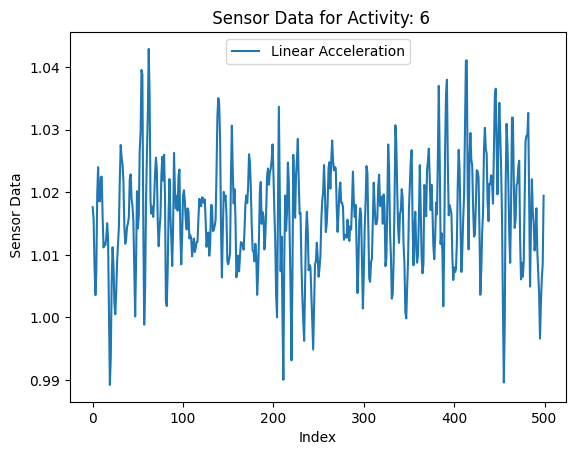

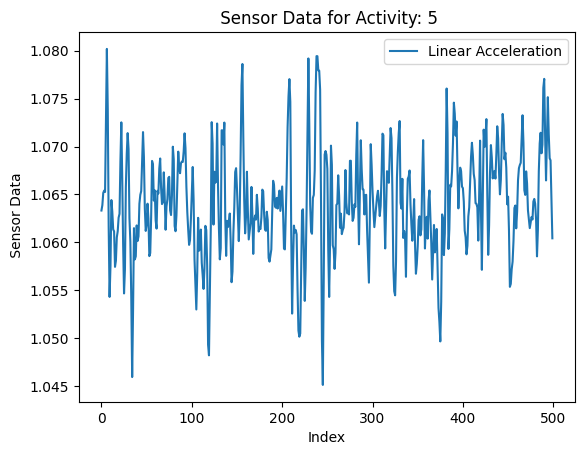

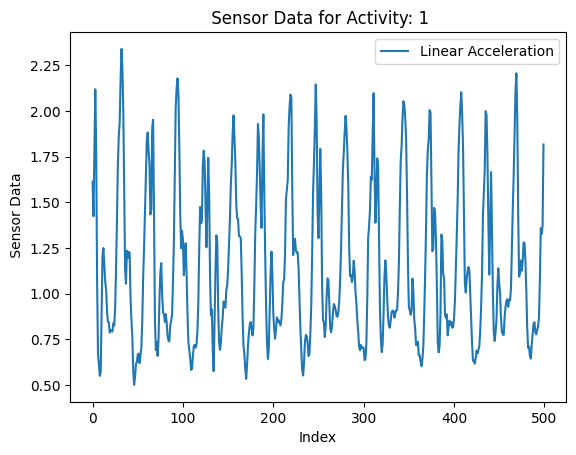

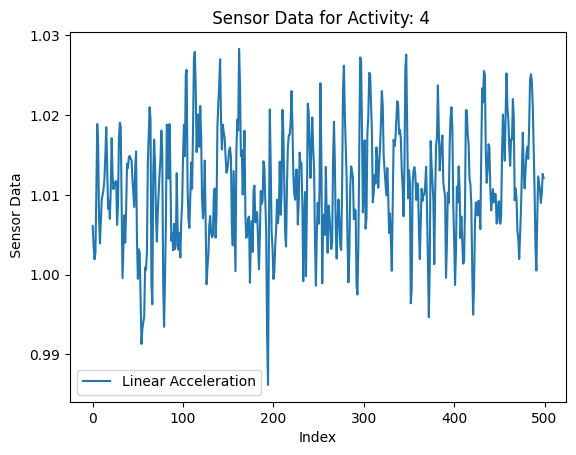

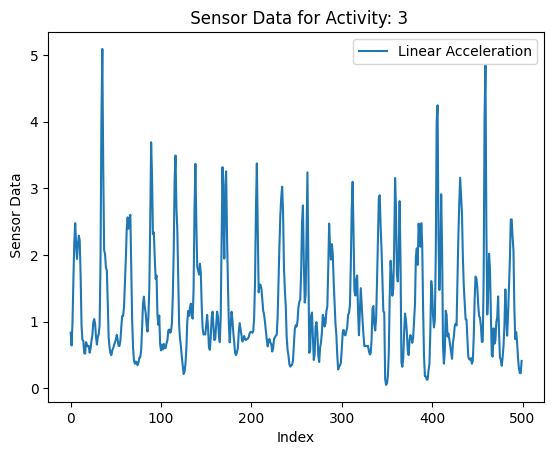

In [ ]:
df_A['Linear acceleration']= np.array(df_A['SensorData accX'])**2+np.array(df_A['SensorData accY'])**2+np.array(df_A['SensorData accZ'])**2


k=[]
for i in range(len(df_A)):
  act=df_A.loc[i,'Activity']
  if not(df_A.loc[i,'Activity'] in k):
    plt.figure()
    k.append(df_A.loc[i,'Activity'])
    plt.plot(df_A.loc[i,'Linear acceleration'], label='Linear Acceleration')
    plt.title(f' Sensor Data for Activity: {act}')
    plt.xlabel('Index')
    plt.ylabel(' Sensor Data')
    plt.legend()
    plt.show()

Task1 Question 3

I have created a seperate dataframe for linear acceleration of 500 activities

In [ ]:
# dk=[]
# for i in range(len(df_A)):
#   dk.append(df_A.loc[i,'Linear acceleration'])

# dk=np.array(dk)



In [ ]:
# df_acc=pd.DataFrame(dk)
df_A

,Activity,SensorData accX,SensorData accY,SensorData accZ,Linear acceleration
0,2,"[0.7170605, 0.7705297, 0.7802221, 0.7758487, 0...","[-0.02063687, -0.0618509, -0.0469533, -0.07290...","[-0.1085871, -0.1241441, -0.1191337, -0.100199...","[0.5263927993500568, 0.6129533099777099, 0.625..."
1,6,"[0.1943966, 0.1938159, 0.1907567, 0.1884863, 0...","[0.5317094, 0.5319046, 0.5332984, 0.5360284, 0...","[0.834933, 0.8337903, 0.8291312, 0.8250651, 0....","[1.01761803862892, 1.01569337096806, 1.0082538..."
2,5,"[1.014063, 1.014794, 1.016345, 1.016434, 1.016...","[-0.1313874, -0.128994, -0.1233053, -0.1260412...","[0.1331963, 0.1320447, 0.1304037, 0.1279989, 0...","[1.0633276711814497, 1.06388211727009, 1.06516..."
3,2,"[1.086435, 1.193352, 1.329559, 1.415901, 1.451...","[-0.1609291, -0.1852366, -0.2485514, -0.340311...","[0.07875328, 0.08093194, 0.07505528, 0.0637638...","[1.2124412635625685, 1.4649515727957236, 1.835..."
4,2,"[0.8793258, 0.9095413, 0.8709586, 0.8850144, 0...","[-0.6723762, -0.6302305, -0.4945624, -0.412695...","[-0.3855393, -0.4209173, -0.4060217, -0.327436...","[1.37394416871657, 1.40162723297523, 1.1680144..."
...,...,...,...,...,...
121,1,"[1.200707, 1.259306, 1.180791, 0.9013768, 0.66...","[-0.007383785, 0.07699168, 0.04459578, -0.0639...","[-0.01987481, -0.05270118, -0.06442619, -0.033...","[1.442146828202462, 1.5945567347986147, 1.4004..."
122,4,"[0.9552025, 0.9537982, 0.9559406, 0.9575983, 0...","[0.245446, 0.2464063, 0.2460058, 0.2486492, 0....","[0.2302799, 0.2280883, 0.228831, 0.2283105, 0....","[1.0256843872662598, 1.02247134359982, 1.02670..."
123,6,"[0.1472669, 0.1469579, 0.1456987, 0.1477679, 0...","[0.9113154, 0.9063752, 0.9018037, 0.9048582, 0...","[0.3883553, 0.3962988, 0.4023564, 0.3931467, 0...","[1.00300313715086, 1.00016536642889, 0.9963686..."
124,2,"[1.366494, 1.26813, 0.9414338, 0.6861533, 0.57...","[-0.7318806, -0.7460761, -0.723163, -0.778362,...","[-0.4718869, -0.3882869, -0.3032955, -0.227725...","[2.62563231108397, 2.31554996060282, 1.5012504..."


In [ ]:
df3 = explode_dataframe(df_A)
df3['Linear acceleration']= np.array(df3['SensorData accX'])**2+np.array(df3['SensorData accY'])**2+np.array(df3['SensorData accZ'])**2
df3

,Activity,SensorData accX,SensorData accY,SensorData accZ,Linear acceleration
0,2,0.717060,-0.020637,-0.108587,0.526393
1,2,0.770530,-0.061851,-0.124144,0.612953
2,2,0.780222,-0.046953,-0.119134,0.625144
3,2,0.775849,-0.072905,-0.100200,0.617296
4,2,0.794940,-0.116625,-0.096305,0.654806
...,...,...,...,...,...
62995,2,0.986156,-0.336087,0.231165,1.138896
62996,2,1.055303,-0.325072,0.238179,1.276065
62997,2,1.105171,-0.325022,0.229771,1.379837
62998,2,1.272920,-0.342714,0.232432,1.791803


PCA on linear acceleration

In [ ]:
pca = PCA(n_components=2)
# linear_acceleration = np.array([np.ravel(arr) for arr in df_A['Linear acceleration']])
# linear_acceleration = np.array(df_A.loc[i'Linear acceleration'].to_list())

result = pca.fit_transform(linear_acceleration)
df_A['PCA_linear_acc_0']=result[:,0]
df_A['PCA_linear_acc_1']=result[:,1]

df_A_1=pd.concat([df_A.loc[:,'Activity'],df_A.loc[:,'PCA_linear_acc_0'],df_A.loc[:,'PCA_linear_acc_1']],axis=1)
df_A_Groupby = df_A.groupby('Activity')

for activity, group in df_A_Groupby:
    print(f"Activity: {activity}")
    # median_PCA_linear_acc_0 = group['PCA_linear_acc_0'].apply(lambda x: pd.Series(x).median())
    # median_PCA_linear_acc_1= group['PCA_linear_acc_1'].apply(lambda x: pd.Series(x).median())
    median_PCA_linear_acc_0 = group['PCA_linear_acc_0']
    median_PCA_linear_acc_1= group['PCA_linear_acc_1']
    plt.plot(group.index, median_PCA_linear_acc_0, label='linearacc_0', marker='o')
    plt.plot(group.index, median_PCA_linear_acc_1, label='linearacc_1', marker='o')
    plt.legend()
    plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0.5263928  0.61295331 0.62514398 ... 1.37983655 1.79180292 2.03468564].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# result = pca.fit_transform(X)
# df_A['PCA_Transformed_0']=result[:,0]
# df_A['PCA_Transformed_1']=result[:,1]


# for activity, group in df_A_Groupby:
#     print(f"Activity: {activity}")
#     median_PCA_Transformed_0 = group['PCA_Transformed_0'].apply(lambda x: pd.Series(x).median())
#     median_PCA_Transformed_1= group['PCA_Transformed_1'].apply(lambda x: pd.Series(x).median())
#     plt.plot(group.index, median_PCA_Transformed_0, label='median_linearacc_0', marker='o')
#     plt.plot(group.index, median_PCA_Transformed_1, label='median_linearacc_1', marker='o')
#     plt.legend()
#     plt.show()

Plotting the PCA of TSFEL

In [ ]:
!pip install tsfel


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
x=[]
y=[]
z=[]
for i in range(len(df_A)):
  x.append(df_A.iloc[i,1])
  y.append(df_A.iloc[i,2])
  z.append(df_A.iloc[i,3])
x=pd.DataFrame(x)
y=pd.DataFrame(y)
z=pd.DataFrame(z)
dataset_only=pd.concat([x,y,z],axis=1)
dataset_only_array=dataset_only.to_numpy()

In [ ]:
dataset_only_array.shape

(126, 1500)

In [ ]:
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()

print(len(Z))
# array_from_df.shape
X = tsfel.time_series_features_extractor(cfg,dataset_only_array)

126
*** Feature extraction started ***


<ipython-input-108-434ee336e6ef>:7: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg,dataset_only_array)



*** Feature extraction finished ***


In [ ]:
X

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,9_Wavelet variance_0,9_Wavelet variance_1,9_Wavelet variance_2,9_Wavelet variance_3,9_Wavelet variance_4,9_Wavelet variance_5,9_Wavelet variance_6,9_Wavelet variance_7,9_Wavelet variance_8,9_Zero crossing rate
0,112.185833,1.060558,1.0,89.748666,0.610225,25.0,100.0,0.611319,1.085872,0.007937,...,0.156288,0.13705,0.197323,0.194921,0.165245,0.157533,0.168032,0.191541,0.230187,12.0


In [ ]:
result = pca.fit_transform(X)
df_A['PCA_Transformed_0']=result[:,0]
df_A['PCA_Transformed_1']=result[:,1]

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

We were plotting the plotting the both the graphs but one graph had a different min max values so we can use min_max scaler or plot all the on different graphs we have to use min max scaler

Activity: 1


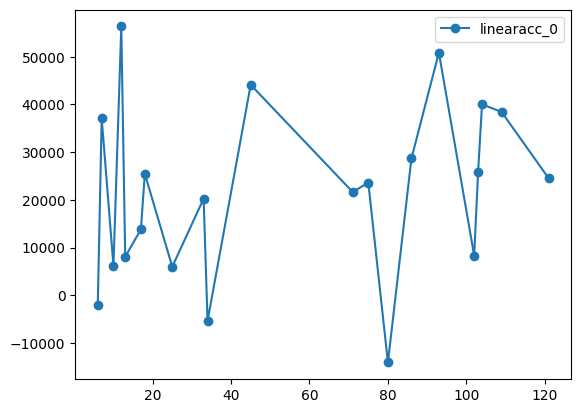

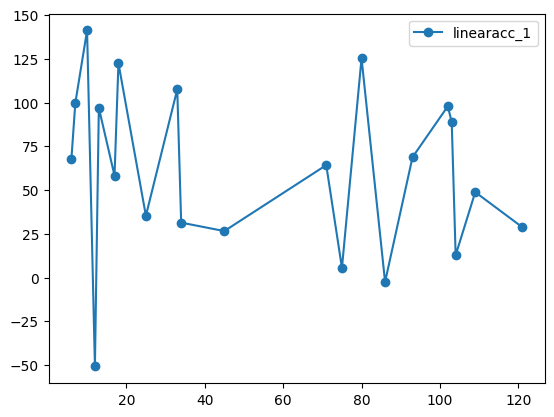

 
Activity: 2


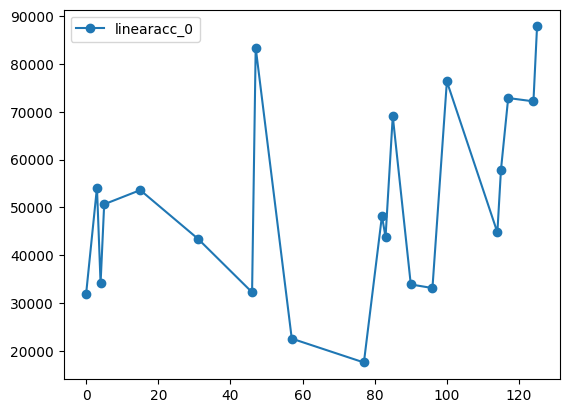

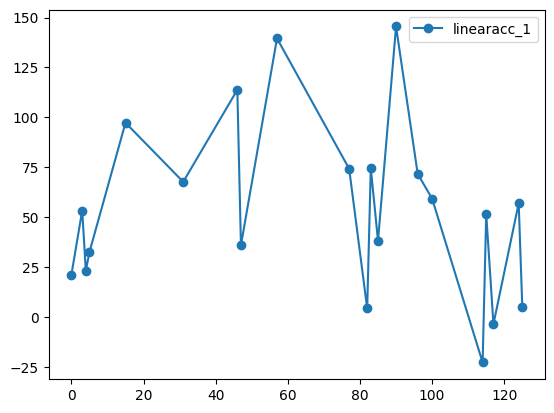

 
Activity: 3


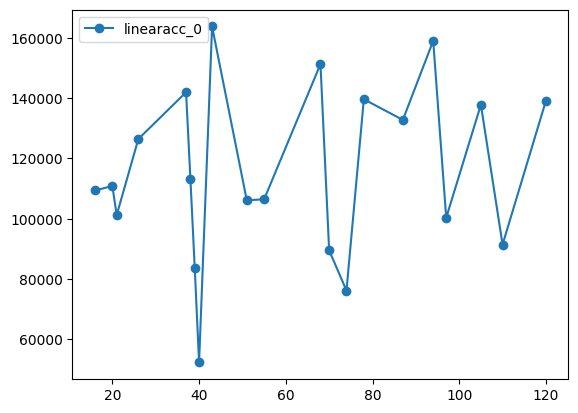

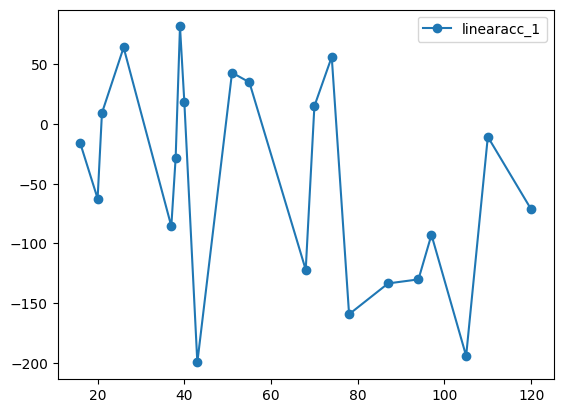

 
Activity: 4


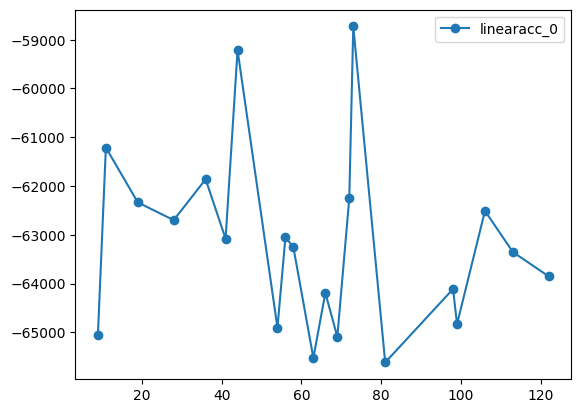

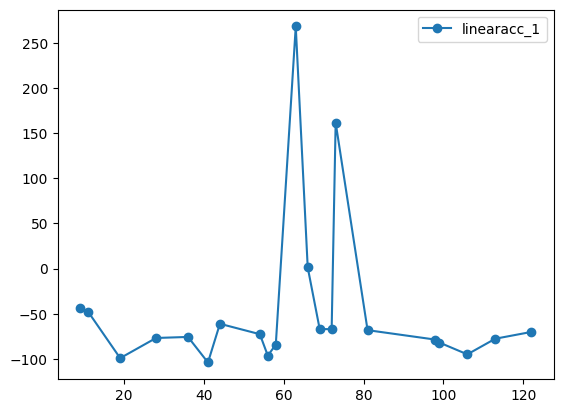

 
Activity: 5


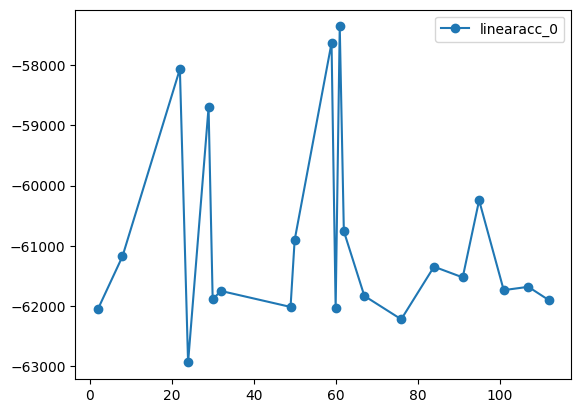

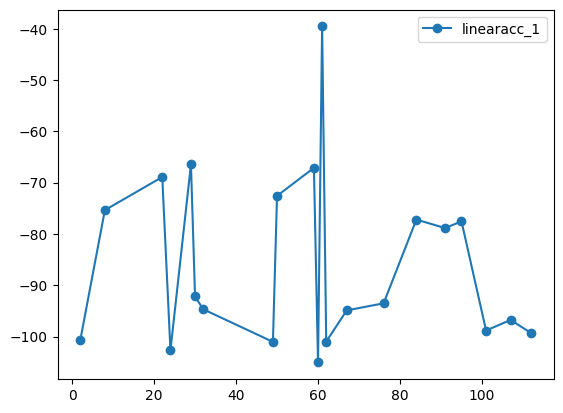

 
Activity: 6


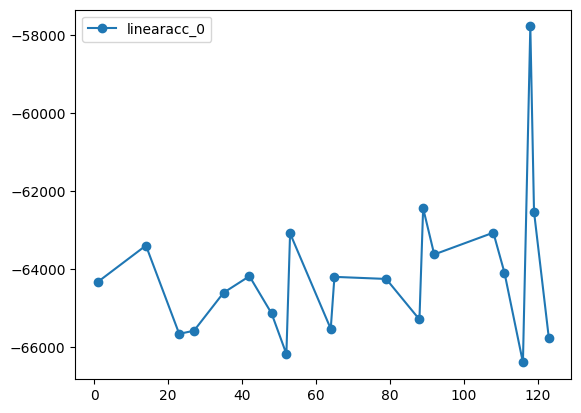

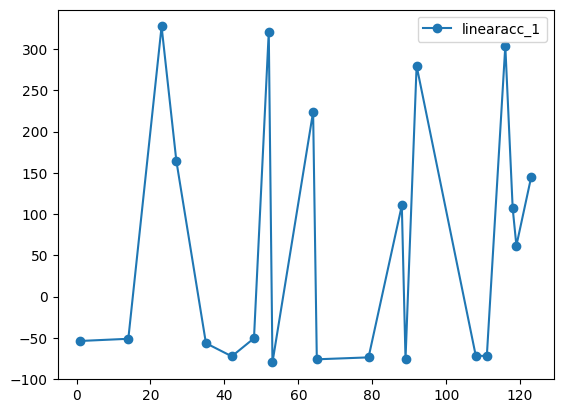

In [ ]:
result = pca.fit_transform(X)
df_A['PCA_TSFEL_0']=result[:,0]
df_A['PCA_TSFEL_1']=result[:,1]

df_A_Groupby = df_A.groupby('Activity')
for activity, group in df_A_Groupby:
    print(f"Activity: {activity}")
    # median_PCA_Transformed_0 = group['PCA_Transformed_0'].apply(lambda x: pd.Series(x).median())
    # median_PCA_Transformed_1= group['PCA_Transformed_1'].apply(lambda x: pd.Series(x).median())
    median_PCA_Transformed_0 = group['PCA_TSFEL_0']
    median_PCA_Transformed_1= group['PCA_TSFEL_1']
    plt.plot(group.index, median_PCA_Transformed_0, label='linearacc_0', marker='o')
    plt.legend()
    plt.show()
    plt.plot(group.index, median_PCA_Transformed_1, label='linearacc_1', marker='o')
    plt.legend()
    plt.show()
    print(' ')

In [ ]:
df_A

,Activity,SensorData accX,SensorData accY,SensorData accZ,Linear acceleration,PCA_linear_acc_0,PCA_linear_acc_1,PCA_Transformed_0,PCA_Transformed_1,PCA_TSFEL_0,PCA_TSFEL_1
0,2,"[0.7170605, 0.7705297, 0.7802221, 0.7758487, 0...","[-0.02063687, -0.0618509, -0.0469533, -0.07290...","[-0.1085871, -0.1241441, -0.1191337, -0.100199...","[0.5263927993500568, 0.6129533099777099, 0.625...",6.394775,2.841708,31954.170289,21.074485,31954.170289,21.074485
1,6,"[0.1943966, 0.1938159, 0.1907567, 0.1884863, 0...","[0.5317094, 0.5319046, 0.5332984, 0.5360284, 0...","[0.834933, 0.8337903, 0.8291312, 0.8250651, 0....","[1.01761803862892, 1.01569337096806, 1.0082538...",-0.454296,-0.295735,-64333.483630,-53.677205,-64333.483630,-53.677205
2,5,"[1.014063, 1.014794, 1.016345, 1.016434, 1.016...","[-0.1313874, -0.128994, -0.1233053, -0.1260412...","[0.1331963, 0.1320447, 0.1304037, 0.1279989, 0...","[1.0633276711814497, 1.06388211727009, 1.06516...",-0.396778,-0.261823,-62054.737792,-100.729044,-62054.737792,-100.729044
3,2,"[1.086435, 1.193352, 1.329559, 1.415901, 1.451...","[-0.1609291, -0.1852366, -0.2485514, -0.340311...","[0.07875328, 0.08093194, 0.07505528, 0.0637638...","[1.2124412635625685, 1.4649515727957236, 1.835...",1.535132,3.152524,54148.965192,53.282985,54148.965192,53.282985
4,2,"[0.8793258, 0.9095413, 0.8709586, 0.8850144, 0...","[-0.6723762, -0.6302305, -0.4945624, -0.412695...","[-0.3855393, -0.4209173, -0.4060217, -0.327436...","[1.37394416871657, 1.40162723297523, 1.1680144...",-3.299637,-1.715557,34082.817716,23.082947,34082.817716,23.082947
...,...,...,...,...,...,...,...,...,...,...,...
121,1,"[1.200707, 1.259306, 1.180791, 0.9013768, 0.66...","[-0.007383785, 0.07699168, 0.04459578, -0.0639...","[-0.01987481, -0.05270118, -0.06442619, -0.033...","[1.442146828202462, 1.5945567347986147, 1.4004...",-4.078978,1.799414,24515.165410,28.799630,24515.165410,28.799630
122,4,"[0.9552025, 0.9537982, 0.9559406, 0.9575983, 0...","[0.245446, 0.2464063, 0.2460058, 0.2486492, 0....","[0.2302799, 0.2280883, 0.228831, 0.2283105, 0....","[1.0256843872662598, 1.02247134359982, 1.02670...",-0.440487,-0.280936,-63854.245700,-70.236011,-63854.245700,-70.236011
123,6,"[0.1472669, 0.1469579, 0.1456987, 0.1477679, 0...","[0.9113154, 0.9063752, 0.9018037, 0.9048582, 0...","[0.3883553, 0.3962988, 0.4023564, 0.3931467, 0...","[1.00300313715086, 1.00016536642889, 0.9963686...",-0.497206,-0.313586,-65765.623348,144.911219,-65765.623348,144.911219
124,2,"[1.366494, 1.26813, 0.9414338, 0.6861533, 0.57...","[-0.7318806, -0.7460761, -0.723163, -0.778362,...","[-0.4718869, -0.3882869, -0.3032955, -0.227725...","[2.62563231108397, 2.31554996060282, 1.5012504...",-5.249217,-2.163130,72171.544717,56.950650,72171.544717,56.950650


PCA on Dataset

We need to convert 3d data to 2d. I have alongated the embedded array in cell to seprated columns then we can use PCA

In [ ]:
x=[]
y=[]
z=[]
for i in range(len(df_A)):
  x.append(df_A.iloc[i,1])
  y.append(df_A.iloc[i,2])
  z.append(df_A.iloc[i,3])
x=pd.DataFrame(x)
y=pd.DataFrame(y)
z=pd.DataFrame(z)
dataset_only=pd.concat([x,y,z],axis=1)
dataset_only_array=dataset_only.to_numpy()

In [ ]:
dataset_only_array.shape

(126, 1500)

In [ ]:
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()
Z=df_A["Linear acceleration"].to_list()
print(len(Z))
# array_from_df.shape
X = tsfel.time_series_features_extractor(cfg,dataset_only_array)

126
*** Feature extraction started ***


<ipython-input-94-407cb4d267eb>:7: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg,dataset_only_array)



*** Feature extraction finished ***


In [ ]:
dataset_only

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.717060,0.770530,0.780222,0.775849,0.794940,0.796748,0.865525,0.922591,0.932409,0.987660,...,-0.131565,-0.108439,-0.075614,-0.082321,-0.085150,-0.066743,-0.059822,-0.049890,-0.038009,-0.028247
1,0.194397,0.193816,0.190757,0.188486,0.191699,0.198384,0.198881,0.194609,0.192555,0.195319,...,0.815203,0.818182,0.814888,0.811876,0.809200,0.804261,0.806681,0.809995,0.811341,0.816337
2,1.014063,1.014794,1.016345,1.016434,1.016305,1.020472,1.023727,1.020927,1.015343,1.011080,...,0.118818,0.116983,0.118030,0.116372,0.114393,0.115135,0.119743,0.128140,0.132916,0.129548
3,1.086435,1.193352,1.329559,1.415901,1.451412,1.451837,1.383331,1.302235,1.264110,1.211888,...,0.108887,0.075423,0.067961,0.032515,0.015958,0.031984,0.028293,0.029538,0.022667,0.017623
4,0.879326,0.909541,0.870959,0.885014,0.831308,0.759089,0.698068,0.650535,0.606433,0.573928,...,-0.365109,-0.428430,-0.558239,-0.582745,-0.579881,-0.616110,-0.570271,-0.509127,-0.443968,-0.310374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.200707,1.259306,1.180791,0.901377,0.662619,0.636312,0.718250,0.724653,0.753370,0.795284,...,-0.177951,-0.069840,-0.050094,-0.056403,-0.095534,-0.060165,-0.013548,-0.011284,0.027452,0.004604
122,0.955202,0.953798,0.955941,0.957598,0.955721,0.953075,0.952975,0.955799,0.959640,0.960614,...,0.225706,0.227842,0.221874,0.224366,0.229312,0.224597,0.225612,0.226634,0.224349,0.227197
123,0.147267,0.146958,0.145699,0.147768,0.149948,0.152029,0.152439,0.152695,0.157887,0.159423,...,0.404009,0.404871,0.398176,0.393161,0.392887,0.396790,0.403947,0.405919,0.400352,0.395099
124,1.366494,1.268130,0.941434,0.686153,0.576789,0.602926,0.681526,0.744146,0.920495,0.993738,...,-0.259815,-0.206610,-0.149549,-0.117111,-0.081489,-0.061553,-0.077742,-0.098264,-0.095193,-0.133702


Apply PCA on dataset only

Activity: 1


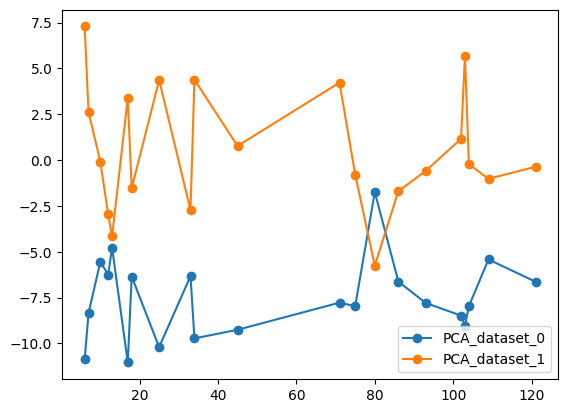

 
Activity: 2


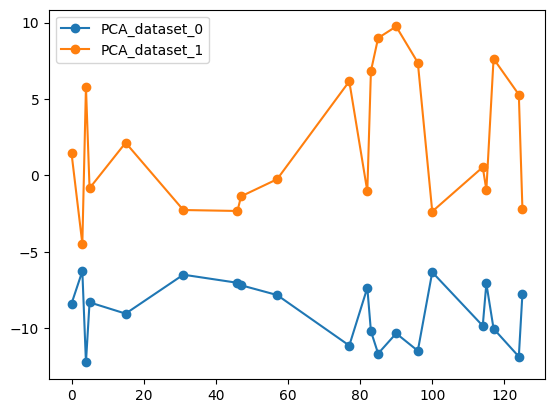

 
Activity: 3


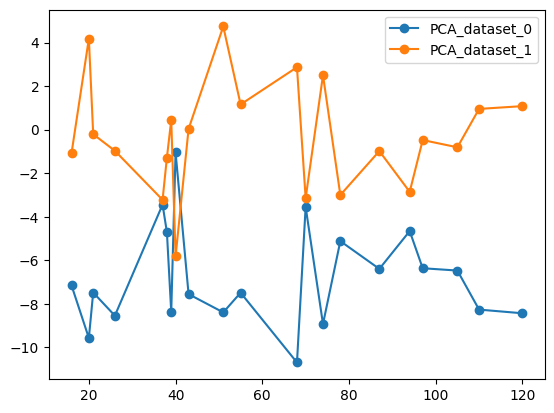

 
Activity: 4


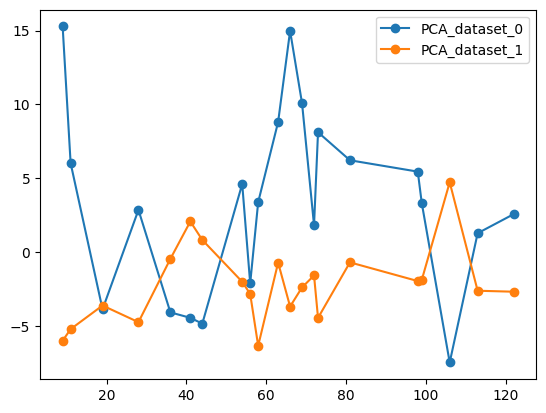

 
Activity: 5


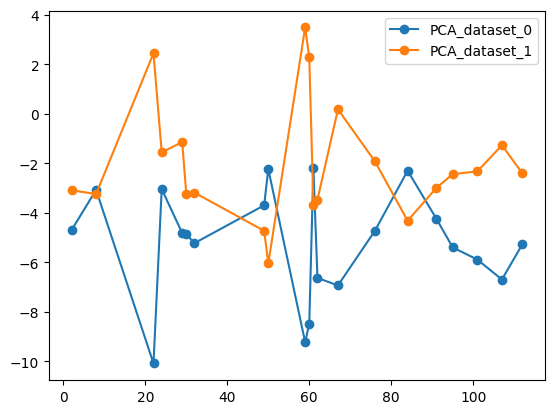

 
Activity: 6


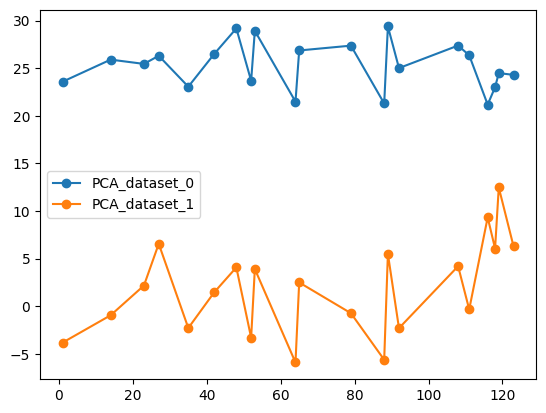

In [ ]:
result = pca.fit_transform(dataset_only)
df_A['PCA_dataset_0']=result[:,0]
df_A['PCA_dataset_1']=result[:,1]

df_A_Groupby = df_A.groupby('Activity')
for activity, group in df_A_Groupby:
    print(f"Activity: {activity}")
    median_PCA_Transformed_0 = group['PCA_dataset_0']
    median_PCA_Transformed_1= group['PCA_dataset_1']
    plt.plot(group.index, median_PCA_Transformed_0, label='PCA_dataset_0', marker='o')
    plt.plot(group.index, median_PCA_Transformed_1, label='PCA_dataset_1', marker='o')
    plt.legend()
    plt.show()
    print(' ')

Comparing the results of PCA on TSFEL, Dataset and linear acceleration

Saving the dataframe df_A for saving time wastes on running all the cells repeatedly

In [ ]:
df_A.to_excel('/content/drive/MyDrive/es335-24-fall-assignment-1-master/df_A_PCA.xlsx',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_A=pd.read_excel('/content/drive/MyDrive/es335-24-fall-assignment-1-master/df_A_PCA.xlsx')

For better visualisation we need to scale all the data to a single range, for that I have used MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_visualisation=df_A.iloc[:,range(7,13)].copy()
df_visualisation=scaler.fit_transform(df_visualisation)

In [ ]:
df_A.head(0)

,Activity,SensorData accX,SensorData accY,SensorData accZ,Linear acceleration,PCA_linear_acc_0,PCA_linear_acc_1,PCA_Transformed_0,PCA_Transformed_1,PCA_TSFEL_0,PCA_TSFEL_1,PCA_dataset_0,PCA_dataset_1


In [ ]:
df_visualisation_new=pd.concat([df_A.iloc[:,0],pd.DataFrame(df_visualisation,columns=df_A.iloc[:,range(7,13)].columns)],axis=1)



In [ ]:
import matplotlib.pyplot as plt

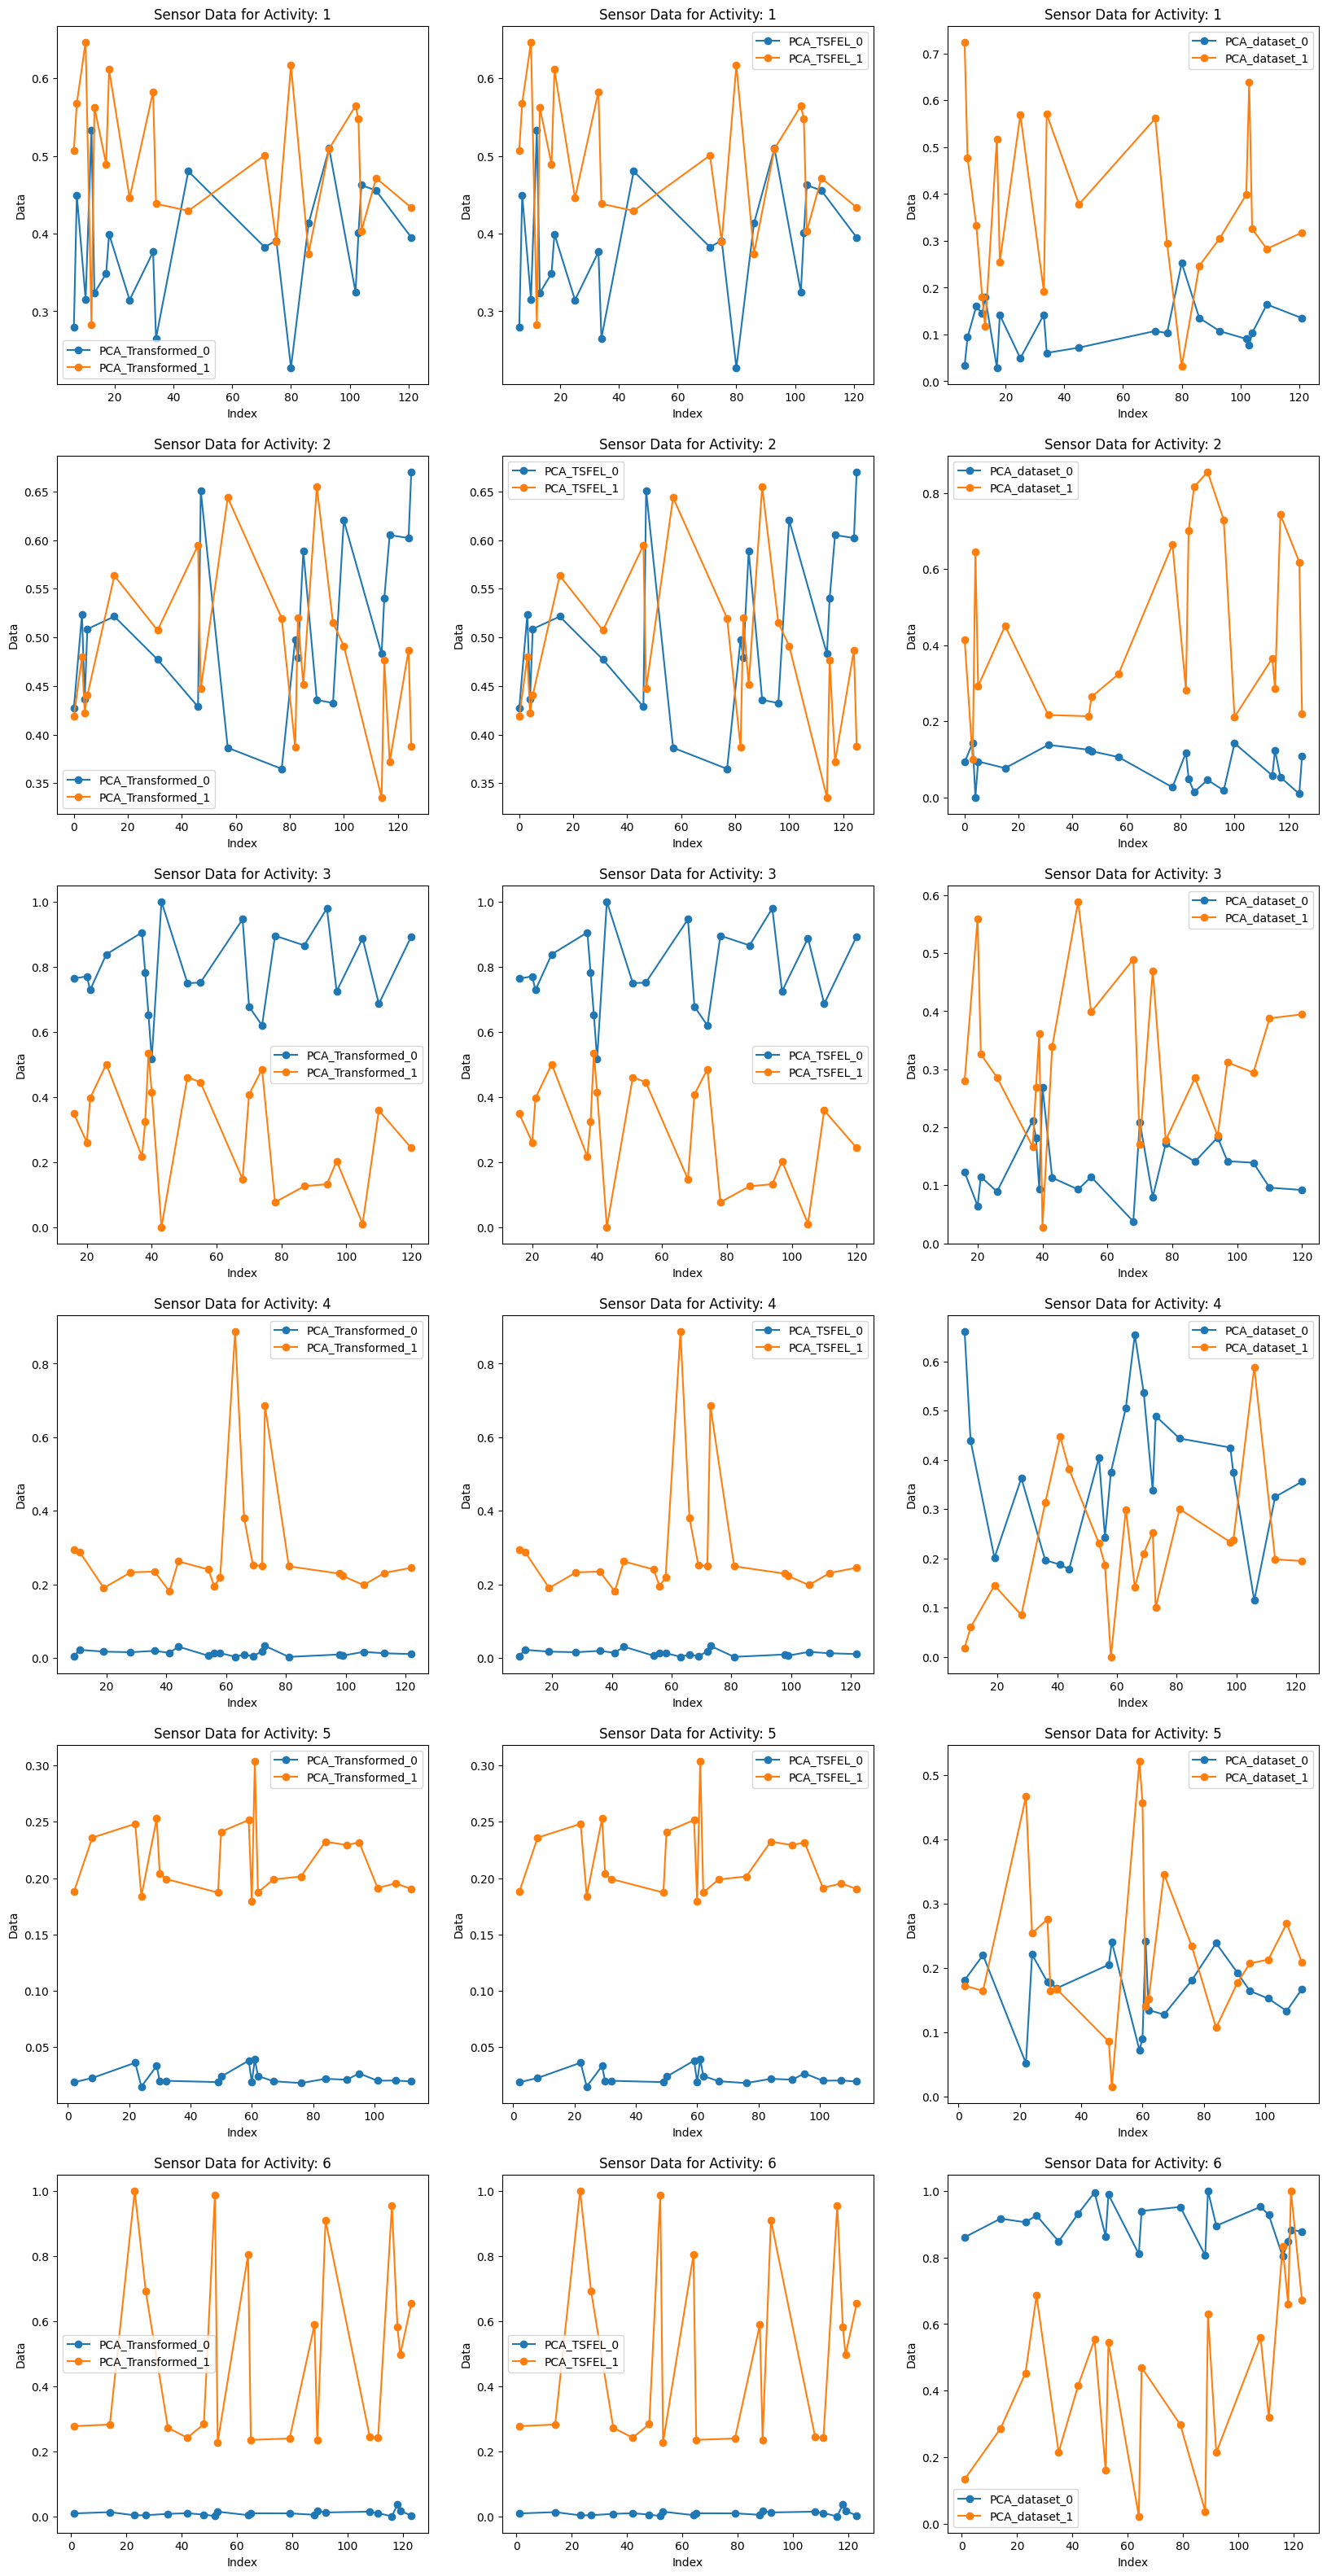

In [ ]:
num_activities = df_A['Activity'].nunique()
fig, axes = plt.subplots(nrows=num_activities, ncols=3, figsize=(20, 40))
df_visual_Groupby=df_visualisation_new.groupby('Activity')
# Loop over each activity and plot on a corresponding subplot
for i, (activity, group) in enumerate(df_visual_Groupby):
  for j in range(1,7,2):
    PCA_0 = group.iloc[:,j]
    PCA_1 = group.iloc[:,j+1]
    ax = axes[i,j//2]  # Select the subplot for the current activity
    ax.plot(group.index, PCA_0, label=df_visualisation_new.columns[j], marker='o')
    ax.plot(group.index, PCA_1, label=df_visualisation_new.columns[j+1], marker='o')
    ax.set_title(f'Sensor Data for Activity: {activity}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Data')
    ax.legend()



Task 1 Question 4

For now we have shown all the correlation matrices later we have to add which features are redundant

Correlation matrix for TSFEL

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
print(correlation_matrix)
plt.show()

                        0_Absolute energy  0_Area under the curve  \
0_Absolute energy                1.000000                0.957363   
0_Area under the curve           0.957363                1.000000   
0_Autocorrelation               -0.000932               -0.013913   
0_Average power                  1.000000                0.957363   
0_Centroid                      -0.034863               -0.041845   
...                                   ...                     ...   
0_Wavelet variance_5             0.979968                0.892038   
0_Wavelet variance_6             0.981978                0.901701   
0_Wavelet variance_7             0.968566                0.899051   
0_Wavelet variance_8             0.933079                0.877341   
0_Zero crossing rate                  NaN                     NaN   

                        0_Autocorrelation  0_Average power  0_Centroid  \
0_Absolute energy               -0.000932         1.000000   -0.034863   
0_Area under the curve 

<Figure size 1200x800 with 0 Axes>

Correlation matrix of dataset

Correlation matrix of given dataset but I think we should convert the 3d data to 2d data by median or by flattening

In [ ]:
correlation_matrix = df_A.iloc[:,[5,6]].corr()
plt.figure(figsize=(12, 8))
print(correlation_matrix)
plt.show()

                  PCA_linear_acc_0  PCA_linear_acc_1
PCA_linear_acc_0      1.000000e+00      2.737782e-17
PCA_linear_acc_1      2.737782e-17      1.000000e+00


<Figure size 1200x800 with 0 Axes>

Task 2 Question 1

In [ ]:
X_train.shape,y_train.shape

((126, 500, 3), (126,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
m=[]
for i in range(2,9):
    nsample,ntime,nfeature = X_train.shape
    xflat = X_train.reshape(nsample,-1)
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(xflat,y_train)
    m.append(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='weighted'))
print(max(m), (m.index(max(m))))
clf = DecisionTreeClassifier(random_state=42, max_depth=m.index(max(m))+2)
clf.fit(xflat,y_train)
print(accuracy_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1))))
print(precision_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(recall_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='macro'))
print(f1_score(y_test,clf.predict(X_test.reshape(X_test.shape[0],-1)),average='micro'))

0.645115015703251 5
0.6666666666666666
0.6511752136752137
0.6666666666666666
0.645115015703251
0.6666666666666666


Trying to training the decision tree using median of 500 samples for each x y and z

In [ ]:
# df_1['Median of acc x']=df_1['SensorData accX'].apply(lambda x: pd.Series(x).median())

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
# X = X_train.reshape(X_train.shape[0], -1)
# X_t= X_test.reshape(X_test.shape[0],-1)
# y = y_train
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X, y_train)
# y_pred = dt_classifier.predict(X_t)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')

Question 2 TSFEL

In [ ]:
df_X = pd.DataFrame({
    'Activity': y_test,
    'SensorData accX': [i for i in X_test[:,:,0]],
    'SensorData accY': [i for i in X_test[:,:,1]],
    'SensorData accZ': [i for i in X_test[:,:,2]]
})
df_X['Linear acceleration']= np.array(df_X['SensorData accX'])**2+np.array(df_X['SensorData accY'])**2+np.array(df_X['SensorData accZ'])**2
x=[]
y=[]
z=[]
for i in range(len(df_A)):
  x.append(df_A.iloc[i,1])
  y.append(df_A.iloc[i,2])
  z.append(df_A.iloc[i,3])
x=pd.DataFrame(x)
y=pd.DataFrame(y)
z=pd.DataFrame(z)
datasetX_only=pd.concat([x,y,z],axis=1)
datasetX_only_array=datasetX_only.to_numpy()
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()

print(len(Z))
# array_from_df.shape
X_X = tsfel.time_series_features_extractor(cfg,datasetX_only_array)

126
*** Feature extraction started ***


<ipython-input-98-e2befb3b2870>:26: UserWarning: Using default sampling frequency set in configuration file.
  X_X = tsfel.time_series_features_extractor(cfg,datasetX_only_array)



*** Feature extraction finished ***


In [ ]:
print(X_X)

   0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0         112.185833                1.060558                1.0   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0        89.748666    0.610225                       25.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      100.0             0.611319             1.085872   

   0_ECDF_0  ...  9_Wavelet variance_0  9_Wavelet variance_1  \
0  0.007937  ...              0.156288               0.13705   

   9_Wavelet variance_2  9_Wavelet variance_3  9_Wavelet variance_4  \
0              0.197323              0.194921              0.165245   

   9_Wavelet variance_5  9_Wavelet variance_6  9_Wavelet variance_7  \
0              0.157533              0.168032              0.191541   

   9_Wavelet variance_8  9_Zero crossing rate  
0              0.230187                  12.0  

[1 rows x 295500 columns]


In [ ]:
x=[]
y=[]
z=[]
for i in range(len(df_A)):
  x.append(df_A.iloc[i,1])
  y.append(df_A.iloc[i,2])
  z.append(df_A.iloc[i,3])
x=pd.DataFrame(x)
y=pd.DataFrame(y)
z=pd.DataFrame(z)
dataset_only=pd.concat([x,y,z],axis=1)
dataset_only_array=dataset_only.to_numpy()

In [ ]:
dataset_only_array.shape

(126, 1500)

In [ ]:
import tsfel
import pandas as pd
cfg = tsfel.get_features_by_domain()
Z=df_A["Linear acceleration"].to_list()
print(len(Z))
# array_from_df.shape
X = tsfel.time_series_features_extractor(cfg,dataset_only_array)

126
*** Feature extraction started ***


<ipython-input-94-407cb4d267eb>:7: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg,dataset_only_array)



*** Feature extraction finished ***


In [ ]:
result = pca.fit_transform(X)
df_X['PCA_Tsfel_0']=result[:,0]
df_X['PCA_Tsfel_1']=result[:,1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming df_A and df_X are already defined
scaler = MinMaxScaler()

# Feature scaling
df_tsfel = scaler.fit_transform(np.array(df_A[['PCA_TSFEL_0', 'PCA_TSFEL_1']]))
df_tsfel_ytrain = np.array(df_A['Activity'])

df_tsfel_X_test = scaler.fit_transform(np.array(df_X[['PCA_Tsfel_0', 'PCA_Tsfel_1']]))
df_tsfel_ytest = np.array(df_X['Activity'])

# Flatten the features for training
nsample, ntime = df_tsfel.shape
xflat = df_tsfel.reshape(nsample, -1)

# List to store F1 scores
m = []

# Training and evaluating the model with different depths
for i in range(2, 9):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(xflat, df_tsfel_ytrain)

    # Reshape the test set and predict
    y_pred = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

    # Calculate weighted F1 score
    m.append(f1_score(df_tsfel_ytest, y_pred, average='weighted'))

# Find the maximum F1 score and its corresponding depth
best_depth = m.index(max(m)) + 2  # Adding 2 because range starts from 2
print("Best F1 Score:", max(m), "at depth:", best_depth)

# Train the model with the best depth
clf = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
clf.fit(xflat, df_tsfel_ytrain)

# Predict and evaluate the model
y_pred_final = clf.predict(df_tsfel_X_test.reshape(df_tsfel_X_test.shape[0], -1))

print("Accuracy:", accuracy_score(df_tsfel_ytest, y_pred_final))
print("Precision (macro):", precision_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("Recall (macro):", recall_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (macro):", f1_score(df_tsfel_ytest, y_pred_final, average='macro'))
print("F1 Score (micro):", f1_score(df_tsfel_ytest, y_pred_final, average='micro'))


Best F1 Score: 0.6233893557422968 at depth: 3
Accuracy: 0.6296296296296297
Precision (macro): 0.6378787878787879
Recall (macro): 0.6296296296296297
F1 Score (macro): 0.6233893557422969
F1 Score (micro): 0.6296296296296297


In [ ]:
df_X.head()